<h1><center>Machine Learning for Inductive Programming</center></h1>
<br/>
<br/>
![](banner.png)
<br/>
<h3><center>By Stuart Reid</center></h3>
<h3><center>Chief Engineer @ NMRQL Research</center></h3>

## Programming paradigms

Programming is a process which takes us from a formulation of some computing problem to a computer program which can solve that problem and which is executable (can run on a computer). A programming paradigm is simply a _way_ of programming.

There are many of ways which we can program including,

1. Imperative programming
2. Procedural programming
3. Object Oriented programming
4. Functional programming, 
5. Inductive programming

Each paradigm has its benefits and drawbacks.

### Imperative Programming

is a way of programming which works by changing the state of a computer using statements. The benefit of imperative programming is that all of your code exists in one (usually massive) program and can be understood sequentially. The downside is that repetative operations in the program cannot be easily reused across different locations.

### Procedural programming

is a way of programming with works by changing the state of a computer using defined sequences of statements (smaller imperative programs) called "procedures". The benefit of procedural programming is that these procedures called multiple times which allows for code reuse. The drawback is that it is hard to control the state of your computer.

### Object Oriented programming

is a way of programming which works by creating objects which contain code and state and expose specific methods for controlling the state of that object. 

Object oriented programming also introduces the concepts of inheritance, encapsulation, and polymorphism. Inheritance allows objects to 'be' other objects. Encapsulation allows objects to 'have' other objects. Polymorphism allows objects to 'redefine' the code / behaviour of other objects from which they inherit very easily.

### Functional programming

is a way of programming which treats all computation as the evaluation of functions (similar to mathematical functions). The benefit of functional programming is that it is _stateless_ and therefore considerably easier to verify. The drawback is that it is usually quite difficult to build large scale systems with functional programming.

### Inductive programming

A drawback to all of the above programming paradigms is that you as the developer somehow need to _work out_ what the code required to a perform a task is. This is especially difficult to do if the problem you are trying to solve is  stochastic or semi-stochastic (randomized), dynamic (changing), or intractable (too complex to deal with).

Inductive programming is a programming paradigm which addresses this problem by _learning_ programs from incomplete information such as input -> output examples. The learnt programs could be logical, functional, or procedural. The drawback is that it can be difficult to understand how the learnt programs actually work.

## A Problem For Inductive Programming: Self-driving Cars

Enabling a car to drive itself is a great example of a problem where we would need to use inductive programming / machine learning. Think of how many scenarios there are which the code would need to take into consideration:

* Shift gears up or down
* Slow down around corners
* Observe the speed limit and don't exceed it
* Observe and stay between the lines
* Don't cross certain type of lines
* Indicate when turning or changing lanes
* Maintain a safe following distance
* Break when an obstruction is in the road
* Try to avoid any form of collision
* Move over for police or ambulances, etc.

### Challenge

The number of possible scenarios is massive, far too many for you to write into code. Furthermore the "rules" of the road cannot be followed blindly and often require some "human" intuition ... is it okay to cross a solid line is an ambulance is trying to pass?

This is a problem which is both intractable and "fuzzy".

### Solution

We can use machine learning algorithms to _learn_ the code required to make a car drive itself. This is done by allowing the car to drive randomly at first and then penalizing it for getting things wrong, and rewarding it for getting things right. 

![title](car3.png)

![title](car4.png)

## So what is Machine Learning?

Machine Learning can be used to do inductive programming (learning programs from incomplete information). Machine Learning is a subfield of Computer Science which deals with algorithms that are capable of automatically learning from data. 

Generally speaking there are three forms of machine learning:

1. Unsupervised learning algorithms
2. Supervised learning algorithms, and
3. Reinforcement learning algorithms

As a Physics graduate you can view Machine Learning as a fantastic suite of computational tools for understanding and processing complex datasets.

## A Shotgun Tour of Machine Learning Algorithms on MNIST

In [1]:
from itertools import chain, combinations
from contextlib import contextmanager
import sys
import os


@contextmanager
def suppress_all():
    with open(os.devnull, "w") as devnull:
        # Redirect stdout to null
        old_stdout = sys.stdout
        sys.stdout = devnull

        # Redirect stderr to null
        old_stderr = sys.stderr
        sys.stderr = devnull

        # Redirect stdin to null
        old_stdin = sys.stdin
        sys.stdin = devnull

        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr
            sys.stdin = old_stdin

## Load A Test Dataset

In [2]:
with suppress_all():
    %matplotlib inline
    import matplotlib.pyplot as plt
    from sklearn import *
    import numpy as np
    from sklearn import datasets
    import pydotplus 
    from IPython.display import Image 
    from sklearn.utils import shuffle
    import numpy.random as rng
    from sklearn.metrics import classification_report
    
    digits = datasets.load_digits()
    n = digits.data.shape[0]
        
    prediction = digits.data[0:15]
    actual_images = digits.images[0:15]
    
    valid_patterns = digits.data[15:515]
    valid_responses = digits.target[15:515]

    patterns = digits.data[515:n]
    responses = digits.target[515:n]

## k-Nearest Neighbours

The K-Means Clustering algorithm is a centroid-based partitional clustering algorithm which works using the mean-shift heuristic. The K-means clustering algorithm consists of three steps (Initialization, Assignment, and Update). These steps are repeated until either the clustering has converged or the number of iterations has been exceeded.

1. Initialization - A set of $k$ centroids are randomly initialized in the search space. These centroids must be in the same order of magnitude as the data patterns.

2. Assignment - Once the centroids have been randomly initialized in the space, we iterate through each pattern in the data set and assign it to the closest centroid.

3. Update - Once the patterns have been assigned to their centroids, the mean-shift heuristic is applied. This heuristic replaces each value in each centroid with the mean of that value over the patterns which have been assigned to it.

![knn algorithm](knn1.png)

![knn algorithm](knn2.png)

![knn algorithm](knn3.png)

In [3]:
with suppress_all():
    my_knn = neighbors.KNeighborsClassifier()
    my_knn.fit(patterns, responses)

predicted_responses = my_knn.predict(valid_patterns)
accuracy = metrics.accuracy_score(valid_responses, predicted_responses) * 100
print("Accuracy on validation set:", str(accuracy) + '%')

Accuracy on validation set: 95.2%


MODEL PREDICTIONS [4 3 1 2 6 1]


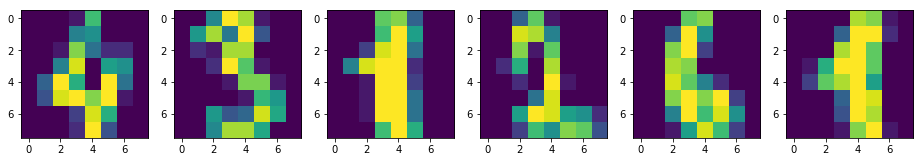

In [4]:
ixs = rng.choice(list(range(15)), 6, replace=False)
print("MODEL PREDICTIONS", my_knn.predict(prediction[ixs]))

fig = plt.figure(figsize=(16, 16))
for i in range(6):
    ax1 = fig.add_subplot(1, 6, i + 1)
    ax1.imshow(actual_images[ixs[i]])

## Support Vector Machine

Support Vector Machines are able to classify nonlinear data using something called 'The Kernel Trick'. This technique works by projecting your original data which exists in an $n$ dimensional space into an $n+1$ dimensional space using a measure of distance or similarity called a kernel. The algorithm then searches for the optimal hyperplane in the $n+1$ dimensional space which best classifies the data.

![KernelTricl](svm.png)

In [5]:
with suppress_all():
    my_svc = svm.SVC()
    my_svc.fit(patterns, responses) 
    
predicted_responses = my_svc.predict(valid_patterns)
accuracy = metrics.accuracy_score(valid_responses, predicted_responses) * 100
print("Accuracy on validation set:", str(accuracy) + '%')

Accuracy on validation set: 42.2%


MODEL PREDICTIONS [5 0 5 3 5 5]


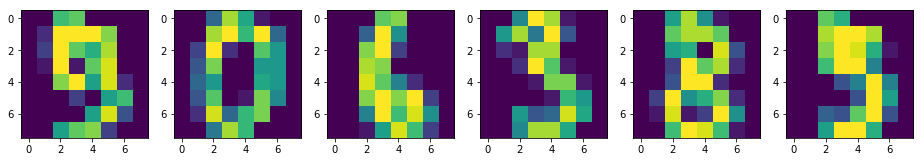

In [6]:
ixs = rng.choice(list(range(15)), 6, replace=False)
print("MODEL PREDICTIONS", my_svc.predict(prediction[ixs]))

fig = plt.figure(figsize=(16, 16))
for i in range(6):
    ax1 = fig.add_subplot(1, 6, i + 1)
    ax1.imshow(actual_images[ixs[i]])

## Decision Tree

A decision tree is just a data structure for decision making. It consists of nodes which represent conditions that direct the flow of logic either left or right. Terminal nodes (ones at the bottom of the tree) represent responses. Decision trees can be setup to do regression or classification. 

Numerous algorithms exist for learning an optimal decision tree from a given dataset of features and responses. These algorithms include ID3, C4.5, and C5.0. Generally speaking splits made at nodes up the tree are either attempting to optimize gini impurity, information gain, or reduce variance.

![Decision Tree](tree.png)

In [7]:
with suppress_all():
    my_tree = tree.DecisionTreeClassifier()
    my_tree.fit(patterns, responses)
    
predicted_responses = my_tree.predict(valid_patterns)
accuracy = metrics.accuracy_score(valid_responses, predicted_responses) * 100
print("Accuracy on validation set:", str(accuracy) + '%')

Accuracy on validation set: 78.2%


MODEL PREDICTIONS [8 0 8 1 0 9]


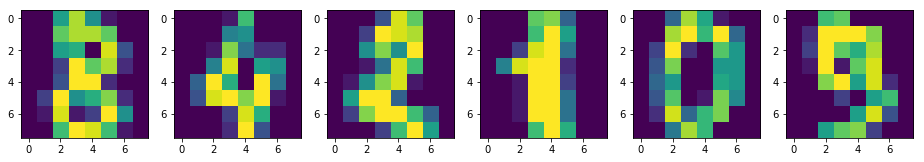

In [8]:
ixs = rng.choice(list(range(15)), 6, replace=False)
print("MODEL PREDICTIONS", my_tree.predict(prediction[ixs]))

fig = plt.figure(figsize=(16, 16))
for i in range(6):
    ax1 = fig.add_subplot(1, 6, i + 1)
    ax1.imshow(actual_images[ixs[i]])

## Random Forest

Ensembling is an approach to Machine Learning wherein numerous models are trained often of different subsets of the data or different features entirely. These models are then aggregated together to produce a combined model which is, hopefully, better than any one of the underlying models. Ensembling is a great technique to reduce variance. Random forests are ensembles of decision trees. 

![](forest.png)

In [14]:
with suppress_all():
    my_forest = ensemble.RandomForestClassifier(n_estimators=100)
    my_forest.fit(patterns, responses)
    
predicted_responses = my_forest.predict(valid_patterns)
accuracy = metrics.accuracy_score(valid_responses, predicted_responses) * 100
print("Accuracy on validation set:", str(accuracy) + '%')

Accuracy on validation set: 93.2%


MODEL PREDICTIONS [1 0 3 6 8 0]


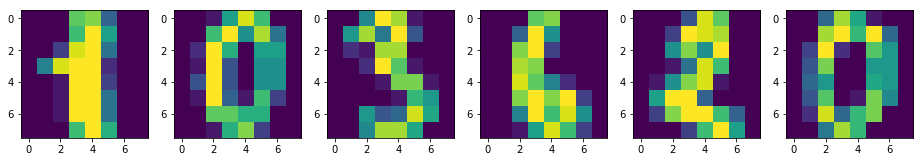

In [15]:
ixs = rng.choice(list(range(15)), 6, replace=False)
print("MODEL PREDICTIONS", my_forest.predict(prediction[ixs]))

fig = plt.figure(figsize=(16, 16))
for i in range(6):
    ax1 = fig.add_subplot(1, 6, i + 1)
    ax1.imshow(actual_images[ixs[i]])

## Deep Neural Network

Neural networks consist of layers of interconnected nodes. Individual nodes are called perceptrons and resemble a multiple linear regression. The difference between a multiple linear regression and a perceptron is that a perceptron feeds the signal generated by a multiple linear regression into an activation function which may or may not be non-linear. 

In a multi layered perceptron (MLP) perceptrons are arranged into layers and layers are connected with other another. In the MLP there are three types of layers namely, the input layer, hidden layer(s), and the output layer. 

The input layer receives input patterns and the output layer could contain a list of classifications or output signals to which those input patterns may map. Hidden layers adjust the weightings on those inputs until the error of the neural network is minimized. 

![Deep Neural Network](dnn.png)

In [11]:
layers = (100, 100, 100, 100, 100, 100, 100, 100, 100, 100)

with suppress_all():
    my_dnn = neural_network.MLPClassifier(early_stopping=True,
                                         hidden_layer_sizes=layers)
    my_dnn.fit(patterns, responses)

predicted_responses = my_dnn.predict(valid_patterns)
accuracy = metrics.accuracy_score(valid_responses, predicted_responses) * 100
print("Accuracy on validation set:", str(accuracy) + '%')

Accuracy on validation set: 92.4%


MODEL PREDICTIONS [3 2 0 3 1 1]


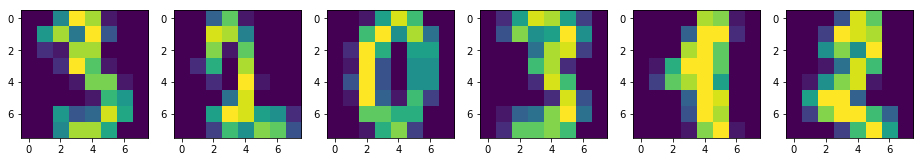

In [12]:
ixs = rng.choice(list(range(15)), 6, replace=False)
print("MODEL PREDICTIONS", my_dnn.predict(prediction[ixs]))

fig = plt.figure(figsize=(16, 16))
for i in range(6):
    ax1 = fig.add_subplot(1, 6, i + 1)
    ax1.imshow(actual_images[ixs[i]])

## NMRQL Research

NMRQL Research is a startup financial services provider operating out of Stellenbosch. Over the past three years we have been developing a fully autonomous, machine-learning driven hedge fund and are now about to launch a unit trust.

We have numerous Regression Models, Decision Trees, Support Vector Machines, Neural Networks, Recurrent Neural Networks, and ensembles / stackers. Our Allocators use various optimization techniques including linear and quadratic programming, Particle Swarms, Genetic Algorithms, and Differential Evolution.

The real power of our system comes from relative ease with which we can arrange the various Experts together to construct massive ensembles of models trained on different datasets, different amounts of historical data, or with different hyperparameters / underlying assumptions. This is where we have found the most success.

### A Typical NMRQL Model 

This model includes 7 advanced Machine Learning algorithms. Three are different deep neural network architectures, three are nonlinear regression ensembles each containing 32 underlying models, and one staggered deep neural network ensemble which contains up to 3 deep neural networks. These 7 models are ensembles in two different ways to produce two uncorrelated forecasts for the top 50 stocks on the JSE. These two forecasts then flow into more numerous portfolio allocation algorithms which tell us how much of each stock to buy and sell.

![A NMRQL Recipes Flow](recipes.png)

## Contact Information

We offer various **internships** and we are currently looking to hire young Machine Learning engineers. We also happen to have a particular fondness for Physics Students :-)




### Website: [www.nmrql.com](www.nmrql.com)
### Email: stuart@nmrql.com
### Contact: 079 891 9476